# RNA-seq differential expression workflow

This notebooks walks through a typical RNA-seq analysis. We start with the 'count matrix' of genes in each sample.

In [3]:
counts <- read.csv("~/extdata/rnaseq/counts.csv", row.names = 1)

The data are read as a `data.frame()`, but a more appropriate structure is a matrix; let's explore the data a little

In [15]:
counts <- as.matrix(counts)
dim(counts)
head(counts)

[1] 33469     8

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
ENSG00000000003,679,448,873,408,1138,1047,770,572
ENSG00000000419,467,515,621,365,587,799,417,508
ENSG00000000457,260,211,263,164,245,331,233,229
ENSG00000000460,60,55,40,35,78,63,76,60
ENSG00000000938,0,0,2,0,1,0,0,0
ENSG00000000971,3251,3679,6177,4252,6721,11027,5176,7995


Several basic properties of RNA-seq data can be seen in this data. For instance, the 'library size' (number of mapped reads) varies between samples and the counts vary greatly between genes

SRR1039508 SRR1039509 SRR1039512 SRR1039513 SRR1039516 SRR1039517 SRR1039520 
  20637971   18809481   25348649   15163415   24448408   30818215   19126151 
SRR1039521 
  21164133

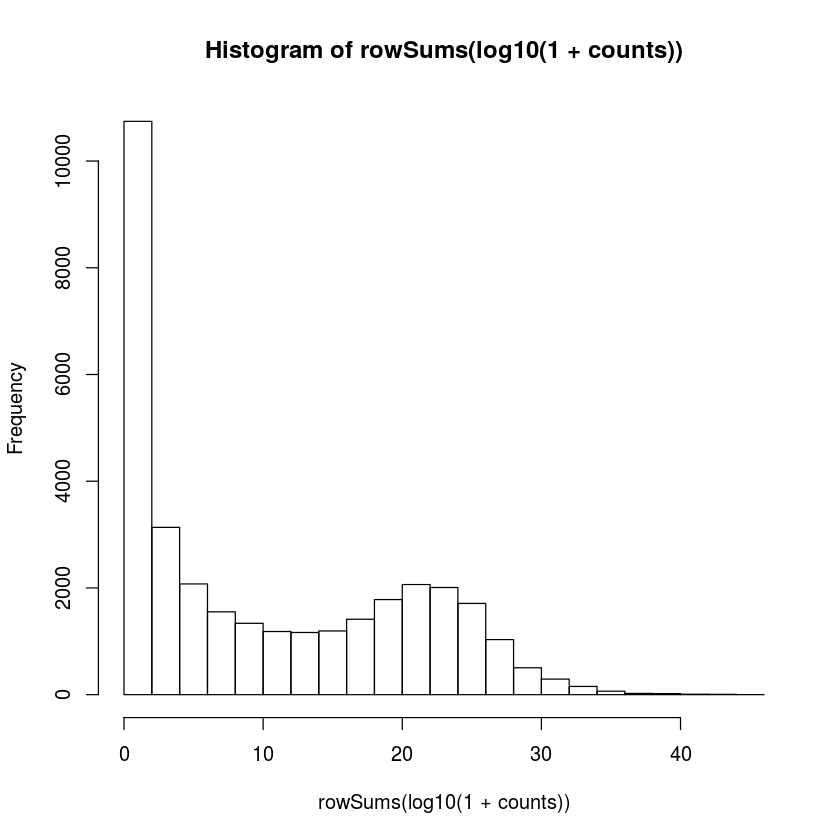

In [6]:
colSums(counts)
hist(rowSums(log10(1 + counts)))

It's also possible to see more sophisticated properties of the data, for instance by plotting the relationship between mean and variance it's clear that the data are 'over-dispersed' relative to Poisson expectation.

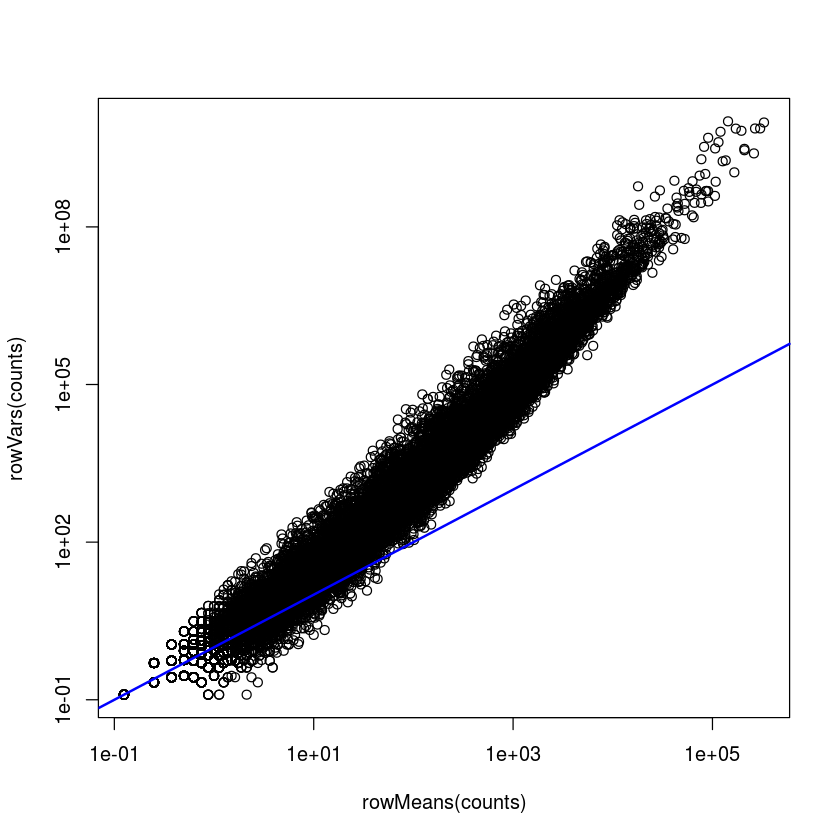

In [19]:
library(matrixStats)
plot(rowVars(counts) ~ rowMeans(counts), log="xy")
abline(0, 1, lwd=2, col="blue")